In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [87]:
import sys

sys.path.append('/mnt/sdceph/users/nroy/radmc3d-2.0/python/radmc3dPy')
sys.path.append('/mnt/home/nroy/test/chimes-IGNIS/chimes-driver/ext-lib/pfh_python')


from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import cm
import matplotlib.patheffects as path_effects
import numpy as np
from matplotlib.patches import Ellipse
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
from matplotlib.patches import Rectangle
import h5py as h5
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.facecolor']='w'
;

''

In [227]:
''' CHOOSE GALAXY, EMISSION, INCLINATION, & APPLY MASKS '''

galaxy = "A4-151"
    # "m12i", "A4-151"
emission = "OIII_5007A"
    # "CII_158mu", "CO_J10", "Halpha", "NII_6585A", "OIII_5007A", "OII_3729A"
inclination = "90"
    #"0", "48", "70", "90"
half_mass = 0
    # 0 - fullmass map, 1 - halfmass map
exclude_outlier_intensity = 0
    # 0 - include abnormally high intensity, 1 - exclude
exclude_low_intensity = 0
    # 0 - fullmass map, 1 - low intensity exclusion
fullmap_halfmass_outline = 1
    #0 - regular fullmass map, 1 - full mass map with outline of halfmass


In [228]:
''' READ IN OF DATA '''

if galaxy == "m12i":
    r = (1024 * (2*4.26/60))*2
    sh = (1024 * (2*1/60))
    scaling = "30 kpc"
    if emission == "CII_158mu":
        intensity_mask = -4
        text = r"$\mathbf{[CII]_{158 \mu m}}$"
        if inclination == "0":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/0deg/CII_158mu/"
            v_minmax = 100
            v_max = 75
            v_sigma = 2
            theta = 0
        if inclination == "48":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/48deg/CII_158mu/"
            v_minmax = 300 
            v_max = 75 
            v_sigma = 10
            theta = (48) * (np.pi/180)
        if inclination == "70":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/70deg/CII_158mu/"
            v_minmax = 300 
            v_max = 75 
            v_sigma = 15
            theta = (70) * (np.pi/180)
        if inclination == "90":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/90deg/CII_158mu/"
            v_minmax = 300
            v_max = 75
            v_sigma = 15
            theta = np.pi/2
    if emission == "CO_J10":
        intensity_mask = -7
        text = r"$\mathbf{CO_{J10}}$"
        if inclination == "0":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/CO_J10/"
            v_minmax = 100
            v_max = 30
            theta = 0
        if inclination == "48":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/48deg/CO_J10/"
            v_minmax = 300 
            v_max = 50 
            theta = (48) * (np.pi/180)
        if inclination == "70":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/70deg/CO_J10/"
            v_minmax = 300 
            v_max = 30 
            theta = (70) * (np.pi/180)
        if inclination == "90":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/CO_J10/"
            v_minmax = 300
            v_max = 30
            theta = np.pi/2
    if emission == "Halpha":
        intensity_mask = -6
        text = r"$\mathbf{H \alpha}$"
        if inclination == "0":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/0deg/Halpha/HI/"
            parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/0deg/Halpha/HII/"
            v_minmax = 150 
            v_max = 75
            v_sigma = 2
            theta = 0
        if inclination == "48":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/48deg/Halpha/HI/"
            parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/48deg/Halpha/HII/"
            v_minmax = 250 
            v_max = 75
            v_sigma = 7
            theta = (48) * (np.pi/180)
        if inclination == "70":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/70deg/Halpha/HI/"
            parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/70deg/Halpha/HII/"
            v_minmax = 250 
            v_max = 75 
            v_sigma = 7
            theta = (70) * (np.pi/180)
        if inclination == "90":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/90deg/Halpha/HI/"
            parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/90deg/Halpha/HII/"
            v_minmax = 250 
            v_max = 75 
            v_sigma = 7
            theta = np.pi/2
    if emission == "NII_6585A":
        intensity_mask = -5 #may differ depending on inclination? -12 for 48 inclination, -7 otherwise
        text = r"$\mathbf{[NII]_{6585A}}$"
        if inclination == "0":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/0deg/NII_6585A/"
            v_minmax = 200 
            v_max = 75
            v_sigma = 2
            theta = 0
        if inclination == "48":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/48deg/NII_6585A/"
            v_minmax = 250 
            v_max = 75 
            v_sigma = 10
            theta = (48) * (np.pi/180)
        if inclination == "70":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/70deg/NII_6585A/"
            v_minmax = 250 
            v_max = 75 
            v_sigma = 10
            theta = (70) * (np.pi/180)
        if inclination == "90":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/90deg/NII_6585A/"
            v_minmax = 250 
            v_max = 75 
            v_sigma = 10
            theta = np.pi/2
    if emission == "OIII_5007A":
        intensity_mask = -5
        text = r"$\mathbf{[OIII]_{5007A}}$"
        if inclination == "0":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/0deg/OIII_5007A/"
            v_minmax = 150 
            v_max = 75 
            v_sigma = 2
            theta = 0
        if inclination == "48":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/48deg/OIII_5007A/"
            v_minmax = 250 
            v_max = 75 
            v_sigma = 7
            theta = (48) * (np.pi/180)
        if inclination == "70":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/70deg/OIII_5007A/"
            v_minmax = 250 
            v_max = 75 
            v_sigma = 10
            theta = (70) * (np.pi/180)
        if inclination == "90":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/90deg/OIII_5007A/"
            v_minmax = 250 
            v_max = 75 
            v_sigma = 10
            theta = np.pi/2
    if emission == "OII_3729A":
        intensity_mask = -5 
        text = r"$\mathbf{[OII]_{3729A}}$"
        if inclination == "0":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/0deg/OII_3729A/"
            v_minmax = 150 #trial
            v_max = 75 #trial
            v_sigma = 2
            theta = 0
        if inclination == "48":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/48deg/OII_3729A/"
            v_minmax = 250 
            v_max = 125
            v_sigma = 7
            theta = (48) * (np.pi/180)
        if inclination == "70":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/70deg/OII_3729A/"
            v_minmax = 250 #trial
            v_max = 75 #trial
            v_sigma = 10
            theta = (70) * (np.pi/180)
        if inclination == "90":  
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations-corrected/90deg/OII_3729A/"
            v_minmax = 250 #trial
            v_max = 75 #trial
            v_sigma = 10
            theta = np.pi/2
            
            
            
if galaxy == "A4-151":
    r = (256 * (2*0.82/4))
    sh = (256 * (2*0.5/4))
    scaling = "2 kpc"
    if emission == "CII_158mu":
        intensity_mask = -2
        text = r"$\mathbf{[CII]_{158 \mu m}}$"
        if inclination == "0":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/0deg/CII_158mu/"
            v_minmax = 300 
            v_max = 300 
            v_sigma = 2
            theta = 0
        if inclination == "48":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/48deg/CII_158mu/"
            v_minmax = 300 
            v_max = 300 
            v_sigma = 2
            theta = (48) * (np.pi/180)
        if inclination == "70":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/70deg/CII_158mu/"
            v_minmax = 300 
            v_max = 300 
            v_sigma = 2
            theta = (70) * (np.pi/180)
        if inclination == "90":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/90deg/CII_158mu/"
            v_minmax = 300 
            v_max = 300 
            v_sigma = 2
            theta = np.pi/2
    if emission == "CO_J10":
        intensity_mask = -2
        text = r"$\mathbf{CO_{J10}}$"
        if inclination == "0":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/CO_J10/"
            v_minmax = 300 
            v_max = 300 
            theta = 0
        if inclination == "48":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/48deg/CO_J10/"
            v_minmax = 300 
            v_max = 300 
            theta = (48) * (np.pi/180)
        if inclination == "70":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/70deg/CO_J10/"
            v_minmax = 300 
            v_max = 300 
            theta = (70) * (np.pi/180)
        if inclination == "90":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/CO_J10/"
            v_minmax = 300 
            v_max = 300 
            theta = np.pi/2
    if emission == "Halpha":
        intensity_mask = -2
        text = r"$\mathbf{H \alpha}$"
        if inclination == "0":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/0deg/Halpha/HI/"
            parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/0deg/Halpha/HII/"
            v_minmax = 300 
            v_max = 150
            v_sigma = 10
            theta = 0
        if inclination == "48":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/48deg/Halpha/HI/"
            parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/48deg/Halpha/HII/"
            v_minmax = 500 
            v_max = 150 
            v_sigma = 10
            theta = (48) * (np.pi/180)
        if inclination == "70":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/70deg/Halpha/HI/"
            parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/70deg/Halpha/HII/"
            v_minmax = 500 
            v_max = 150 
            v_sigma = 10
            theta = (70) * (np.pi/180)
        if inclination == "90":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/90deg/Halpha/HI/"
            parent_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/90deg/Halpha/HII/"
            v_minmax = 400 
            v_max = 100 
            v_sigma = 12
            theta = np.pi/2
    if emission == "NII_6585A":
        intensity_mask = -4
        text = r"$\mathbf{[NII]_{6585A}}$"
        if inclination == "0":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/0deg/NII_6585A/"
            v_minmax = 5000 
            v_max = 150 
            v_sigma = 5
            theta = 0
        if inclination == "48":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/48deg/NII_6585A/"
            v_minmax = 1000 
            v_max = 250
            v_sigma = 5
            theta = (48) * (np.pi/180)
        if inclination == "70":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/70deg/NII_6585A/"
            v_minmax = 350 
            v_max = 200
            v_sigma = 5
            theta = (70) * (np.pi/180)
        if inclination == "90":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/90deg/NII_6585A/"
            v_minmax = 350 
            v_max = 200 
            v_sigma = 5
            theta = np.pi/2
    if emission == "OIII_5007A":
        intensity_mask = -3
        text = r"$\mathbf{[OIII]_{5007A}}$"
        if inclination == "0":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/0deg/OIII_5007A/"
            v_minmax = 300 
            v_max = 200 
            v_sigma = 5
            theta = 0
        if inclination == "48":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/48deg/OIII_5007A/"
            v_minmax = 300 
            v_max = 200 
            v_sigma = 5
            theta = (48) * (np.pi/180)
        if inclination == "70":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/70deg/OIII_5007A/"
            v_minmax = 400 
            v_max = 200 
            v_sigma = 5
            theta = (70) * (np.pi/180)
        if inclination == "90":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations-corrected/90deg/OIII_5007A/"
            v_minmax = 400
            v_max = 200 
            v_sigma = 5
            theta = np.pi/2
    if emission == "OII_3729A":
        intensity_mask = -5 #trial
        text = r"$\mathbf{[OII]_{3729A}}$"
        if inclination == "0":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/OII_3729A/"
            v_minmax = 300 #trial
            v_max = 200 #trial
            theta = 0
        if inclination == "48":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/OII_3729A/"
            v_minmax = 500 #trial
            v_max = 200 #trial
            theta = (48) * (np.pi/180)
        if inclination == "70":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/OII_3729A/"
            v_minmax = 400 #trial
            v_max = 200 #trial
            theta = (70) * (np.pi/180)
        if inclination == "90":
            parent = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/OII_3729A/"
            v_minmax = 400 #trial
            v_max = 200 #trial
            theta = np.pi/2
;

''

In [229]:
''' CALC MOMENT 0 '''

filepath_tot = parent + 'image_tot.hdf5'
filepath_con = parent + 'image_continuum.hdf5'
file_con = h5.File(filepath_con,'r')
file_tot = h5.File(filepath_tot,'r')

npix_x = np.shape(file_tot['image_array'][:])[0]
npix_y = np.shape(file_tot['image_array'][:])[1]

image_array = file_tot['image_array'][:] - file_con['image_array'][:]

image_array[image_array < 0] = 0

frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)


if emission == "Halpha":
    filepath_tot_2 = parent_2 + 'image_tot.hdf5'
    filepath_con_2 = parent_2 + 'image_continuum.hdf5'
    file_con_2 = h5.File(filepath_con,'r')
    file_tot_2 = h5.File(filepath_tot,'r')

    npix_x_2 = np.shape(file_tot_2['image_array'][:])[0]
    npix_y_2 = np.shape(file_tot_2['image_array'][:])[1]

    image_array_2 = file_tot_2['image_array'][:] - file_con_2['image_array'][:]

    image_array_2[image_array_2 < 0] = 0

    frequency_array_2 = 3e8 / (file_tot_2['lambda_array'][:] * 1e-6)

    image_array = image_array + image_array_2



#moment 0
integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

integrated_image_array_moment0[0,0] = 0 #final moment 0 array
M0_arr = integrated_image_array_moment0

'''
if half_mass == 1: 
    if inclination == "0":
        midpointx = len(M0_arr) / 2
        midpointy = len(M0_arr[0]) / 2
        for i in range(len(M0_arr)):
            for j in range(len(M0_arr[i])):
                x = i - midpointx
                y = j - midpointy
                dist = np.sqrt(x**2 + y**2)
                if dist > r:
                    M0_arr[i][j] = 0
    if inclination == "48" or inclination == "70":
        midpointx = len(M0_arr) / 2
        midpointy = len(M0_arr[0]) / 2
        for i in range(len(M0_arr)):
            for j in range(len(M0_arr[i])):
                # find distance of i and j from center
                x_i = i - midpointx
                y_j = j - midpointy
                dist_ij = np.sqrt(x_i**2 + y_j**2)
                # find angle of line for some i and j 
                working_angle = np.arctan2(y_j, x_i)
                # find distance of ellipse edge from center for that angle
                dist_e = ((r**2)*np.cos(theta))/(np.sqrt(((r*np.cos(theta)*np.cos(working_angle))**2)+((r*np.sin(working_angle))**2)))
                # determine if distance of i and j is greater than distance of ellipse at that angle
                if dist_ij > dist_e:
                    M0_arr[i][j] = 0
    if inclination == "90": 
        midpointx = len(M0_arr) / 2
        midpointy = len(M0_arr[0]) / 2
        for i in range(len(M0_arr)):
            for j in range(len(M0_arr[i])):
                x = np.abs(i - midpointx)
                y = np.abs(j - midpointy)
                if x > r or y > sh:
                    M0_arr[i][j] = 0
'''
;

''

In [230]:
''' CALC MOMENT 1 '''

#moment 1
lambda_0_dict = {"Halpha": 0.65600490570068359, 
                 "CII_158mu": 157.62730407714844, 
                 "NII_6585A": 0.65807253122329712,
                 "NII_6548A": 0.6545339822769165,
                 "OIII_5007A": 0.50047838687896729, 
                 "CO_J10": 2600.757634}

lambda_0 = lambda_0_dict[emission]
lambda_array = np.array(file_con['lambda_array'])
velocity_arr = (lambda_array - lambda_0) * 3e5 / lambda_array 


moment1_noint = velocity_arr * image_array

integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
isolate_moment_1[0,0] = 0 #final moment 1 array
M1_arr = isolate_moment_1

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


In [231]:
''' CALC MOMENT 2 '''

#moment 2
isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

for i in range(len(velocity_arr)):
    for j in range(len(image_array)):
        for k in range(len(image_array)):
            isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

integrated_image_array_moment2[0,0] = 0

isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
isolate_moment_2[0,0] = 0

isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
M2_arr = isolate_moment_2

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


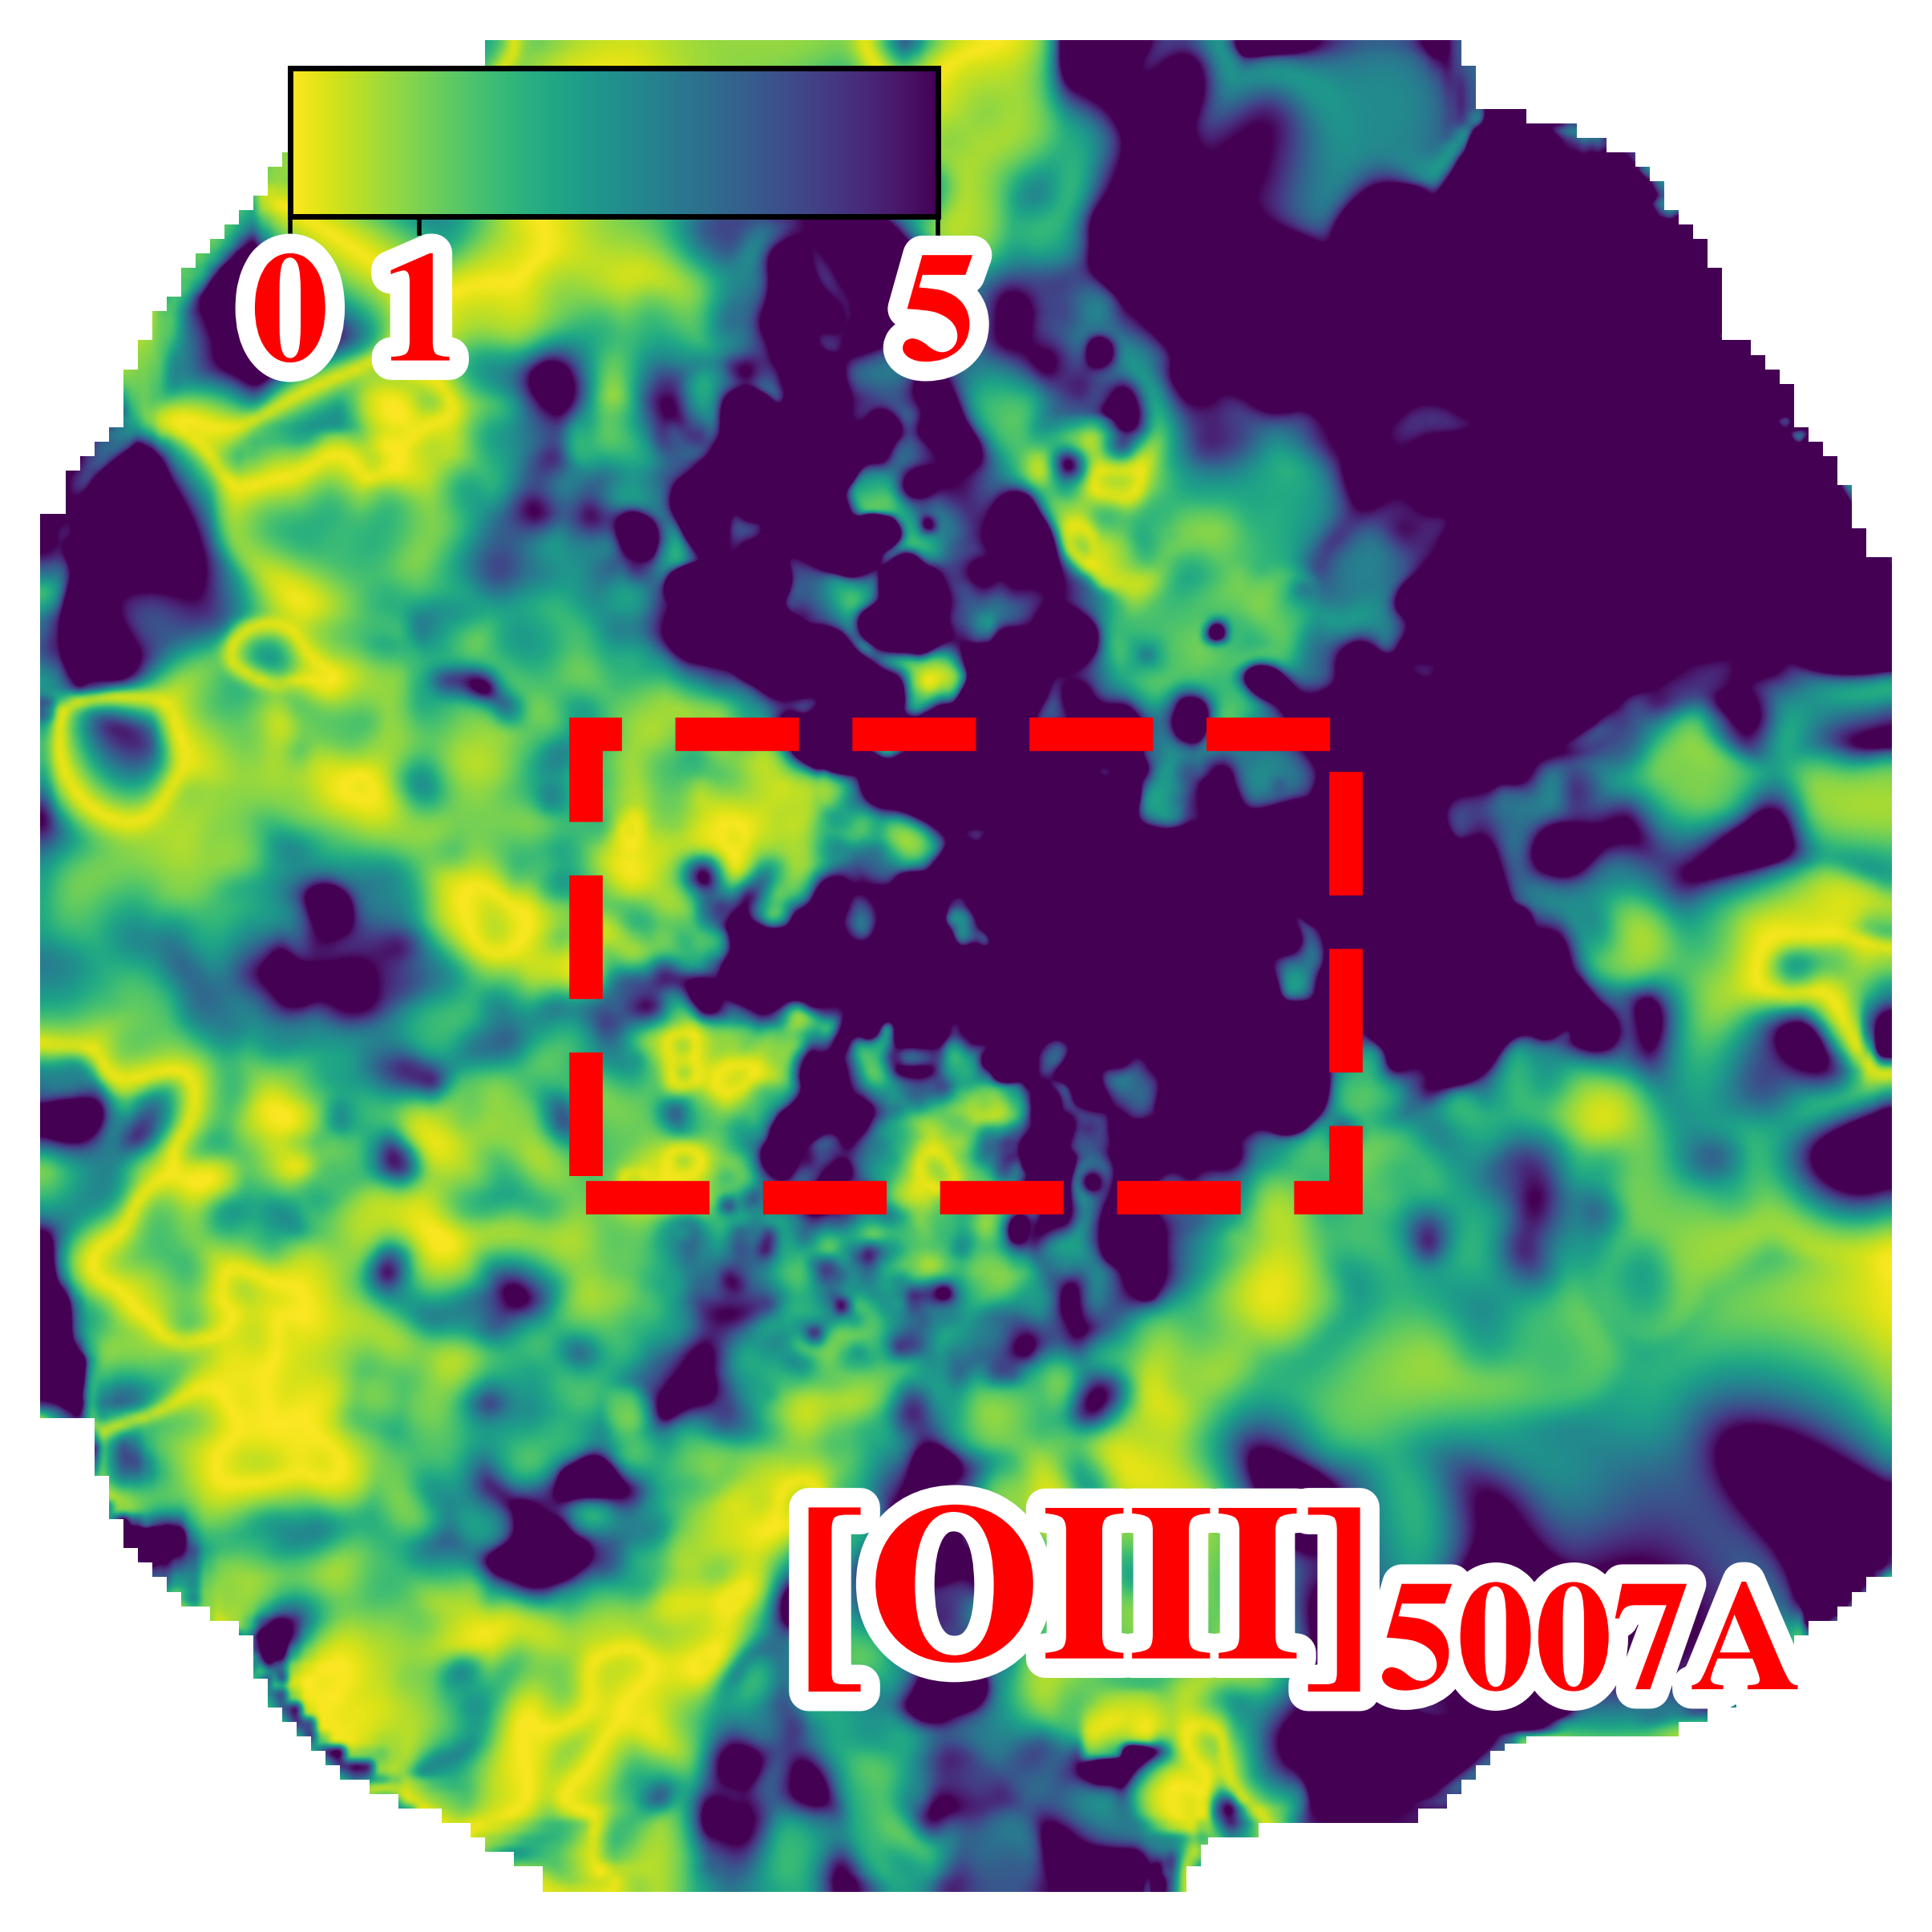

In [232]:
''' CALC SPATIALLY RESOLVED V/sigma AND PLOT '''

v_sigma_map = np.sqrt((M1_arr**2)/(M2_arr**2))

if half_mass == 1: 
    #r = 256 * (2*4.26/60) #m12i
    #r = 256 * (2*0.82/4) #A4-151
    #r = 256 * (2*0.86/4) #A4-152
    #r = 256 * (2*0.645/4) #A4-155
    midpointx = len(v_sigma_map) / 2
    midpointy = len(v_sigma_map[0]) / 2
    for i in range(len(v_sigma_map)):
        for j in range(len(v_sigma_map[i])):
            x = i - midpointx
            y = j - midpointy
            dist = np.sqrt(x**2 + y**2)
            if dist > (r + tolerance):
                v_sigma[i][j] = 0

if exclude_low_intensity == 1: 
    for i in range(len(M0_arr)):
        for j in range(len(M0_arr[i])):
            if np.log10(M0_arr[i][j]/np.max(M0_arr)) < intensity_mask:
                v_sigma[i][j] = np.nan 



params = {"text.color" : 'k',
          "ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams.update(params)

figx, figy = 8,6

fig, ax = plt.subplots(figsize=(figx,figy), dpi=500, facecolor='w') #change dpi to 500 for production runs
cmap = matplotlib.cm.hot.copy()
low = 'w' #cmap(0)
cmap.set_bad(color = low)

plt.imshow(v_sigma_map.T, vmin = 0, vmax = v_sigma, extent=(-2,2,-2,2), \
           interpolation='bicubic', cmap='viridis_r', origin='lower') #change to viridis for paper? 
plt.xlabel('X (kpc)', fontsize = 14)
plt.ylabel('Y (kpc)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axis('off')

txt = plt.text(1.8, -1.5, text, fontsize = 40, fontweight = "bold", color = "red", horizontalalignment="right")
cb = plt.colorbar() 
cb.remove()
colbar = 'k'
cbaxes = inset_axes(ax, width="70%", height="40%", bbox_to_anchor=(0.0,0.8,0.5,0.2), bbox_transform = ax.transAxes)  #change position
cbar = plt.colorbar(cax=cbaxes, orientation='horizontal')

cbar.set_ticks([0, 1, v_sigma]) 
cbar.set_ticklabels(['0', '1', v_sigma])

'''
# Uncomment For Top Right Row Emission (CO in this case)
cbar.set_label(label = r'$\mathbf{V/\sigma}$',\
               size = 40, color="red", labelpad = 2)
'''

fontprops1 = fm.FontProperties(size = 28, weight = "bold")

cbar.ax.tick_params(labelsize=25)
for label in cbar.ax.get_xticklabels():
    label.set_fontproperties(fontprops1)
    label.set_color("red")  # Set text color to black
    label.set_path_effects([path_effects.withStroke(linewidth=7, foreground="white")])

txt.set_path_effects([path_effects.Stroke(linewidth=7, foreground='white'), path_effects.Normal()])

cbar.outline.set_color("k")
cbar.outline.set_linewidth(1)
cbar.ax.xaxis.set_tick_params(color="k")

if fullmap_halfmass_outline == 1:
    if inclination == "90":
        # Map dimensions and extent
        x_extent = (-2, 2)  # kpc
        y_extent = (-2, 2)
        x_phys_size = x_extent[1] - x_extent[0]
        y_phys_size = y_extent[1] - y_extent[0]

        # Get pixel → kpc scaling
        scale_x = x_phys_size / v_sigma_map.shape[0]
        scale_y = y_phys_size / v_sigma_map.shape[1]

        # Center in kpc
        midpointx_pix = v_sigma_map.shape[0] / 2
        midpointy_pix = v_sigma_map.shape[1] / 2
        center_x_kpc = x_extent[0] + midpointx_pix * scale_x
        center_y_kpc = y_extent[0] + midpointy_pix * scale_y
        
        # Rectangle dimensions
        width_kpc = r * scale_x  # full length of the rectangle in kpc
        height_kpc = sh * scale_y  # full height in kpc

        # Create the rectangle with bottom-left corner as the center
        rectangle = Rectangle(
            (center_x_kpc - width_kpc / 2, center_y_kpc - height_kpc / 2),  # bottom-left corner
            width_kpc, height_kpc, edgecolor='red', facecolor='none', linewidth=6, linestyle='--')

        # Add rectangle to the plot
        ax.add_patch(rectangle)
        
    else: 
        # Map dimensions and extent
        x_extent = (-2, 2)  # kpc
        y_extent = (-2, 2)
        x_phys_size = x_extent[1] - x_extent[0]
        y_phys_size = y_extent[1] - y_extent[0]

        # Get pixel to kpc scaling
        scale_x = x_phys_size / v_sigma_map.shape[0]
        scale_y = y_phys_size / v_sigma_map.shape[1]

        # Center in kpc
        midpointx_pix = v_sigma_map.shape[0] / 2
        midpointy_pix = v_sigma_map.shape[1] / 2
        center_x_kpc = x_extent[0] + midpointx_pix * scale_x
        center_y_kpc = y_extent[0] + midpointy_pix * scale_y

        # Major and minor axes in kpc
        major_axis_kpc = r * scale_x  # assuming r is in pixels
        minor_axis_kpc = major_axis_kpc * np.cos(theta)

        ellipse = Ellipse(xy=(center_x_kpc, center_y_kpc),
                          width=major_axis_kpc, height=minor_axis_kpc,
                          angle=0,
                          edgecolor='red', facecolor='none', linewidth=6, linestyle='--')

        ax.add_patch(ellipse)

plt.savefig('spatial_vsigma_A4_OIII_90_halfmassellipse.png', bbox_inches='tight', pad_inches = 0)
plt.show()